In [1]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg


In [2]:
import os
os.chdir('..')

# VGG-Transformers

In [2]:
config = Cfg.load_config_from_name('vgg_transformer')


In [4]:
config['weights'] = './weights/vietocr/transformerocr.pth'
# config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'

config['cnn']['pretrained']=False
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False


In [5]:
detector = Predictor(config)


In [6]:
dataset = './datasets/OCR/ground_truth/'

In [7]:
img_files = [os.path.join(dataset, file) for file in os.listdir(dataset) if file.endswith('.jpg')]



'So HD: 09007'

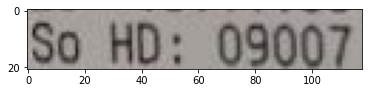

In [8]:
img = img_files[6]
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

In [23]:
results = {}
for img_path in sorted(img_files):
    img = Image.open(img_path)
    s = detector.predict(img)
    filename = os.path.splitext(os.path.split(img_path)[1])[0]
    results[filename] = s

In [103]:
txt_files = [os.path.join(dataset, file) for file in os.listdir(dataset) if file.endswith('.txt')]
ground_truth = {}
for file in sorted(txt_files):
    with open(file, 'rb') as f:
        s = f.read()
        filename = os.path.splitext(os.path.splitext(os.path.split(file)[1])[0])[0]
        ground_truth[filename] = s.decode('utf-8')

In [104]:
len(results)

309

In [105]:
len(ground_truth)

309

In [106]:
from jiwer import wer

In [107]:
import pandas as pd

In [108]:
error_ = pd.DataFrame(ground_truth.values(), index=ground_truth.keys(), columns=['y_true'], dtype=str)
error_['y_pred'] = pd.DataFrame(results.values(), index=results.keys(), dtype=str)

In [109]:
error_['WER'] = error_.apply(lambda x: wer(x['y_pred'], x['y_true']), axis=1)

In [110]:
error_ = error_.rename_axis('filename').reset_index()

In [111]:
error_

,filename,y_true,y_pred,WER
0,img_10_25_12_padded_bill_code_52,So HD: 06277,180 HD: 06277,0.333333
1,img_10_25_12_padded_bill_code_53,So HD: 06277,180 HD: 06277,0.333333
2,img_10_25_12_padded_date_52,Ngay: 5/11/2020\n,Ngay: 5/11/2020,0.000000
3,img_10_25_12_padded_date_53,Ngay: 5/11/2020\n,Ngay: 5/11/2020,0.000000
4,img_10_25_12_padded_market_name_52,Co.opMart PHAN THIET,Co.opmart PHAN THIET,0.333333
...,...,...,...,...
304,img_9_padded_bill_code_7,So HD: 09870,So HD: 09870,0.000000
305,img_9_padded_date_6,Ngay: 8/10/2020,Ngay: 8/10/2020,0.000000
306,img_9_padded_date_7,Ngay: 8/10/2020,Ngay: 8/10/2020,0.000000
307,img_9_padded_market_name_6,Co.opMart LY THUONG KIET,Theo Co.opMart LY THuong KIET Nam,0.500000


In [115]:
error_['WER'].mean()

0.21370010787486515

# VGG-Seq2Seq

In [3]:
config = Cfg.load_config_from_name('vgg_seq2seq')


In [4]:
config['weights'] = './weights/vgg_seq2seq_finetuned.pth'
# config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'

config['cnn']['pretrained']=True
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False


In [5]:
detector = Predictor(config)


In [6]:
dataset = './datasets/OCR/original/'

In [7]:
img_files = [os.path.join(dataset, file) for file in os.listdir(dataset) if file.endswith('.jpg')]



'So HD: 09007'

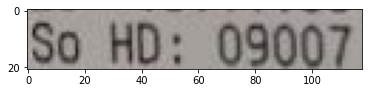

In [8]:
img = img_files[6]
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

In [9]:
results = {}
for img_path in sorted(img_files):
    img = Image.open(img_path)
    s = detector.predict(img)
    filename = os.path.splitext(os.path.split(img_path)[1])[0]
    results[filename] = s

In [15]:
# Read annotations

with open('datasets/OCR/train_annotation.txt', 'r') as f:
    lines = f.readlines()
    train_annotations = [line.strip().split('\t') for line in lines]

with open('datasets/OCR/test_annotation.txt', 'r') as f:
    lines = f.readlines()
    test_annotations = [line.strip().split('\t') for line in lines]


In [16]:
test_annotations

[['original/img_36_25_12_padded_market_name_47.jpg', 'Co.opMart DONG XOAI'],
 ['original/img_49_25_12_padded_bill_code_44.jpg', 'So HD: 04756'],
 ['original/img_44_padded_date_30.jpg', 'Ngay: 8/10/2020'],
 ['original/img_10_25_12_padded_market_name_52.jpg', 'Co.opMart PHAN THIET'],
 ['original/img_41_25_12_padded_bill_code_40.jpg', 'So HD: 02629'],
 ['original/img_36_25_12_padded_bill_code_47.jpg', 'So HD: 06796'],
 ['original/img_33_padded_bill_code_22.jpg', 'So HD: 00526'],
 ['original/img_14_padded_market_name_10.jpg', 'Co.opMart LY THUONG KIET'],
 ['original/img_24_25_12_padded_market_name_55.jpg', 'Co.opMart PHAN THIET'],
 ['original/img_9_padded_market_name_6.jpg', 'Co.opMart LY THUONG KIET'],
 ['original/img_41_padded_bill_code_29.jpg', 'So HD: 06261'],
 ['original/img_49_25_12_padded_market_name_44.jpg',
  'Co.opMart NGUYEN ANH THU'],
 ['original/img_13_padded_date_9.jpg', 'Ngay: 8/10/2020'],
 ['original/img_1_padded_market_name_1.jpg', 'Co.opMart XA LO HA NOI'],
 ['original/im

# Make train_test splits

In [103]:
txt_files = [os.path.join(dataset, file) for file in os.listdir(dataset) if file.endswith('.txt')]
ground_truth = {}
for file in sorted(txt_files):
    with open(file, 'rb') as f:
        s = f.read()
        filename = os.path.splitext(os.path.splitext(os.path.split(file)[1])[0])[0]
        ground_truth[filename] = s.decode('utf-8')

In [104]:
len(results)

309

In [105]:
len(ground_truth)

309

In [106]:
from jiwer import wer

In [107]:
import pandas as pd

In [108]:
error_ = pd.DataFrame(ground_truth.values(), index=ground_truth.keys(), columns=['y_true'], dtype=str)
error_['y_pred'] = pd.DataFrame(results.values(), index=results.keys(), dtype=str)

In [109]:
error_['WER'] = error_.apply(lambda x: wer(x['y_pred'], x['y_true']), axis=1)

In [110]:
error_ = error_.rename_axis('filename').reset_index()

In [111]:
error_

,filename,y_true,y_pred,WER
0,img_10_25_12_padded_bill_code_52,So HD: 06277,180 HD: 06277,0.333333
1,img_10_25_12_padded_bill_code_53,So HD: 06277,180 HD: 06277,0.333333
2,img_10_25_12_padded_date_52,Ngay: 5/11/2020\n,Ngay: 5/11/2020,0.000000
3,img_10_25_12_padded_date_53,Ngay: 5/11/2020\n,Ngay: 5/11/2020,0.000000
4,img_10_25_12_padded_market_name_52,Co.opMart PHAN THIET,Co.opmart PHAN THIET,0.333333
...,...,...,...,...
304,img_9_padded_bill_code_7,So HD: 09870,So HD: 09870,0.000000
305,img_9_padded_date_6,Ngay: 8/10/2020,Ngay: 8/10/2020,0.000000
306,img_9_padded_date_7,Ngay: 8/10/2020,Ngay: 8/10/2020,0.000000
307,img_9_padded_market_name_6,Co.opMart LY THUONG KIET,Theo Co.opMart LY THuong KIET Nam,0.500000


In [115]:
error_['WER'].mean()

0.21370010787486515

# Fine-tuning

In [118]:
# Preparing

In [9]:
with open('datasets/OCR/ground_truth.txt', 'r') as f:
    lines = f.readlines()
    annotations = [l.strip().split(' ', 1) for l in lines]


In [11]:
import random

In [12]:
# gt_items = list(ground_truth.items())
# random.shuffle(gt_items)

random.shuffle(annotations)

In [14]:
train_size = 0.8

train_data = []
test_data = []
for i, (filename, annotation) in enumerate(annotations):
    if i < int(train_size * len(annotations)):
        train_data.append(''.join([os.path.join('processed', filename), '\t', annotation, '\n']))
    else:
        test_data.append(''.join([os.path.join('processed', filename), '\t', annotation, '\n']))


In [15]:
with open('datasets/OCR/train_annotation.txt', 'w') as f:
    for row in train_data:
        f.write(row)
    f.close()

with open('datasets/OCR/test_annotation.txt', 'w') as f:
    for row in test_data:
        f.write(row)
    f.close()

In [16]:
config = Cfg.load_config_from_name('vgg_transformer')


In [40]:
dataset_params = {
    'name': 'processed',
    'data_root':'./datasets/VietOCR/data_line',
    'data_root':'.',
    'train_annotation': 'train_annotation.txt',
    'valid_annotation': 'test_annotation.txt'
}

params = {
         'print_every': 100,
         'valid_every': 15*100,
          'iters': 20000,
          'checkpoint':'./weights/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr_finetuned.pth',
          'metrics': 10000,
        
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'


In [41]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 100,
  'valid_every': 1500,
  'iters': 20000,
  'export': './weights/transformerocr_finetuned.pth',
  'checkpoint': './weights/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'processed',
  'data_root': './datasets/VietOCR/data_line',
  'train_annotation': 'train_annotation.txt',
  'valid_annotation': 'test_annotation.txt',
  'image_height': 32,
  '

In [42]:
from vietocr.model.trainer import Trainer

In [43]:
trainer = Trainer(config, pretrained=True)



Computing MD5: /tmp/tranformerorc.pth
MD5 matches: /tmp/tranformerorc.pth


Create train_processed: 100%|█████████████████████████████████| 5483/5483 [00:03<00:00, 1795.31it/s]

Created dataset with 5482 samples



Create valid_processed: 100%|█████████████████████████████████| 1813/1813 [00:00<00:00, 1894.99it/s]

Created dataset with 1812 samples



valid_processed build cluster: 100%|████████████████████████| 1812/1812 [00:00<00:00, 149357.94it/s]


In [44]:
import matplotlib.pyplot as plt

In [45]:
%matplotlib inline

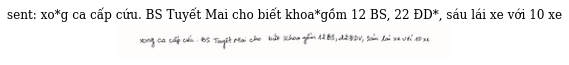

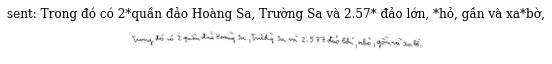

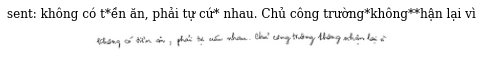

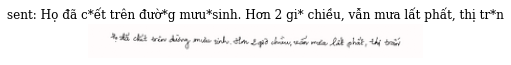

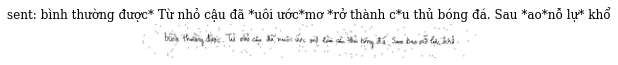

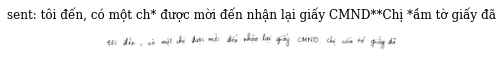

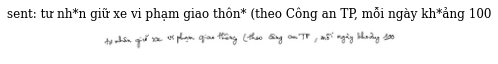

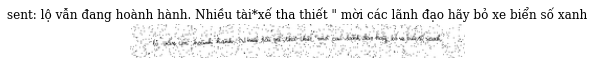

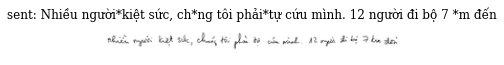

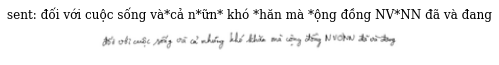

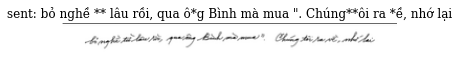

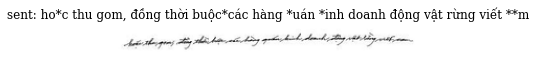

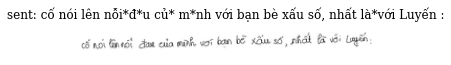

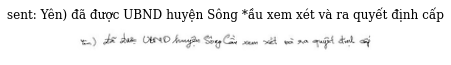

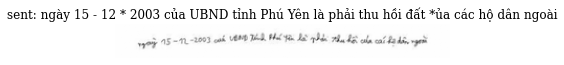

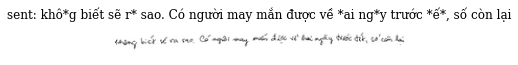

In [46]:
# sử dụng lệnh này để visualize tập train, bao gồm cả augmentation 
trainer.visualize_dataset()

In [ ]:

# bắt đầu huấn luyện 
trainer.train()


In [ ]:
b

# Inference

In [25]:
config = Cfg.load_config_from_name('vgg_transformer')


In [31]:
config['weights'] = './weights/vietocr/transformerocr.pth'
# config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'

config['cnn']['pretrained'] = True
config['device'] = 'cuda:0'
config['predictor']['beamsearch'] = False


In [32]:
detector = Predictor(config)


In [33]:
dataset = './datasets/OCR/product_attributes//'

In [34]:
img_files = [os.path.join(dataset, file) for file in os.listdir(dataset) if file.endswith('.jpg')]



'033a3653064 my3,508?57.000.080.6'

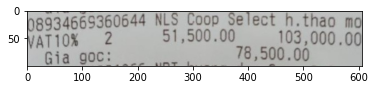

In [35]:
img = img_files[5]
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s